# 데이터분석 순서

### KDD 분석 방법론
1. 데이터셋 선택 : CSV, EXCEL, DB에서 데이터를 읽어옴
2. 데이터 전처리 : 데이터타입, 결측치처리, 이상치탐지, 데이터분포분석, 상관관계
3. 데이터 변환(특성추출) : 원본 데이터에서 새로운 데이터 생성, 삭제, 스케일링, 구간화 등
4. 데이터 마이닝(모델 만들기, 분석) : 분석에 적합한 알고리즘 선택, 모델 생성/튜닝
5. 결과 평가(인사이트 도출) : 테스트 데이터를 이용해 데이터 마이닝으로 만든 모델의 성능 평가 


# 데이터 전처리
- 데이터 타입 변환
- 결측치 탐지 및 보간
- 이상치 탐지 및 처리
- 데이터 특성 파악(치우침, 분포 특성)
- 변수들 간의 상관관계 분석

In [2]:
import pandas as pd
import numpy as np

# 1. 데이터셋 선택 및 로딩
- 데이터 로드 후 head(), tail()로 컬럼 및 데이터 파악

In [22]:
data = pd.read_csv('./data/Taitanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. .info()로 컬럼명, 결측치, 데이터 타입 파악

In [4]:
# 데이터가 너무 커서 Non-Null이 표시되지 않는 경우 : show_counts=True
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3. describe()로 기초통계량 파악(이상치 파악)

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 결측값 찾고, 비율 보고, 대치 / 삭제 수행
- isna().sum() : 컬럼별 결측치를 확인 가능
- isna().sum() / len(데이터프레임명) * 100 : 컬럼별 결측치가 차지하는 비율 확인
    
## 결측값 처리
- 결측값 비율이 5% 미만 : 행, 열 제거하여 사용(분석에 큰 영향을 미치지 않음)
- 결측값 비율이 5%~30% : 결측값을 대체(Imputation)
    - 수치형 데이터(숫자형, 나이, 가격 등) : 평균, 중앙값, 최빈값(mode)으로 대체 가능
    - 범주형 데이터(문자형/숫자형, 선실등급, 탑승지 등) : 최빈값(mode)로 대체 가능
-  결측값 비율이 30%~50% : 컬럼의 중요도에 따라서 결측값을 대체 혹은 삭제
- KNN(K-Nearst Heighbor, 최근접이웃) imputer, 회귀분석을 통한 결측값 대체
- 결측값 50% 이상 : 해당 컬럼 삭제
   

In [7]:
# 컬럼별 결측치 확인
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Embarked : 5% 미만이므로 결측치 대체나 행을 제거
# Age : 결측치 대체
# Cabin : 해당 컬럼 삭제

# 컬럼별 결측치 확인
# data.isna().sum()

# 컬럼별 결측치가 차지하는 비율 확인
data.isna().sum() / len(data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## 결측 데이터의 종류
- MCAR(완전 무작위 결측) : 다른 변수와 무관하게 생긴 결측(랜덤, 이유 없음)
    - 설문 조사 중 일부 응답자가 무작위로 답변 건너뜀
- MAR(무작위 결측) : 다른 변수와는 관련 있지만 본인과는 무관
    - 나이 많은 사람들이 소득란에 응답하지 않은 경우(나이와 관련)
    - 직업에 따라 학력란에 응답하지 않는 경우(가정환경, 소득)
- NMAR(비무작위 결측) : 변수 자기 자신과 직접 관련이 있는 경우
    - 소득이 낮은 사람이 자신의 소득을 숨기는 경우(소득과 결측이 직접 관련)
    - 체중이 많이 나가는 경우 자신의 체중을 숨기는 경우
    - 만족도가 낮은 고객이 만족도 조사에 응하지 않는 경우

## 결측치 처리방법
- 1) 단순대치법(simple imputation)
    - (1) 완전 분석 : 결측값이 있는 모든 행을 삭제하고 완전한 자료만으로 분석(잘 안씀)
        - 결측값을 삭제해도 모델을 만들기에 충분히 많은 데이터가 있는 경우
        - 결측값을 삭제한 후에 데이터에 편향이 없다는 전제가 있을 때
        - dropna() : 결측값이 있는 모든 행 삭제
    - (2) 평균 대치법 : 결측치가 있는 컬럼에서 데이터의 평균을 구한 후 결측값을 대치
        - 평균을 이용하기 때문에 간편
        - 데이터에 이상치가 없는 경우 평균값 대체 가능
        - 데이터에 이상치가 있는 경우 중앙값이나 최빈값 고려

### (1) 완전 분석 

In [11]:
# 결측치를 모두 제거
data2 = data.copy()
data2.dropna()

# 제거되고 남은 행 : 183
# 전체 데이터셋의 수 중에서 남은 데이터셋이 차지하는 비율 확인
# 20% 정도는 너무 적기 때문에 해당 데이터셋에는 적합하지 않음
183 / len(data2) * 100

20.53872053872054

### (2) 평균 대치법

In [9]:
a = pd.Series([24, 5, 10, 34, 20, 18, 28, 23]) # 이상치가 없는 경우
b = pd.Series([24, 5, 10, 34, 20, 18, 28, 2000]) # 이상치가 있는 경우

In [10]:
print('a의 평균값 = ',a.mean())
print('b의 평균값 = ',b.mean())

a의 평균값 =  20.25
b의 평균값 =  267.375


a의 평균값 =  20.25
b의 평균값 =  267.375


{'whiskers': [<matplotlib.lines.Line2D at 0x1ab9ab61880>,
 'caps': [<matplotlib.lines.Line2D at 0x1ab9ab61d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ab9ab61580>],
 'medians': [<matplotlib.lines.Line2D at 0x1ab9ab7f2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ab9ab7f580>],
 'means': []}

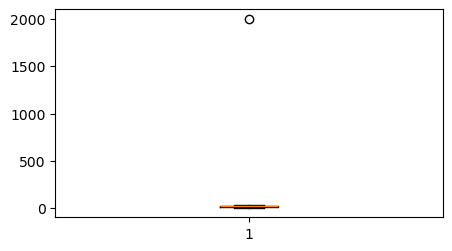

In [12]:
import matplotlib.pyplot as plt

# 이상치가 없는 경우와 있는 경우를 생성
a = pd.Series([24, 5, 10, 34, 20, 18, 28, 23]) # 이상치가 없는 경우
b = pd.Series([24, 5, 10, 34, 20, 18, 28, 2000]) # 이상치가 있는 경우

# 각 평균을 확인(이상치가 존재하는 경우 평균에 영향을 준다는 사실 확인)
print('a의 평균값 = ',a.mean())
print('b의 평균값 = ',b.mean())

# 이상치가 존재하는지 확인하기 위해 박스수염 그래프로 확인
# 너무 크거나 작은 이상치는 평균에 영향을 줌
plt.subplots(figsize = (5, 2.7))
plt.boxplot(b)

In [14]:
# 이상치가 존재하는 경우는 평균 대치 어려움
# 각 데이터 오름차순 정렬
print(sorted(b))
print(sorted(a))
print()

# 중앙값으로 대체해도 괜찮다고 판단
# 중앙값 확인
print('a의 중앙값 = ', np.median(a))
print('b의 중앙값 = ', np.median(b))


[5, 10, 18, 20, 24, 28, 34, 2000]
[5, 10, 18, 20, 23, 24, 28, 34]

a의 중앙값 =  21.5
b의 중앙값 =  22.0


In [13]:
print(sorted(b))

[5, 10, 18, 20, 24, 28, 34, 2000]

In [14]:
print(sorted(a))

[5, 10, 18, 20, 23, 24, 28, 34]

#### Age 컬럼의 결측값을 평균 대치법으로 대치

In [24]:
data0 = data.copy()

# Age 컬럼의 결측치 확인
print(data0['Age'].isna().sum())
print()

# Age 컬럼의 통계량 확인
print(data0['Age'].describe())

177

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [25]:
# Age 컬럼에서 결측치가 존재하는 행의 인덱스만 추출하여 저장
age_na_idx = data0[data0['Age'].isna()].index

In [31]:
# 평균값으로 대체 및 결측치 존재 행만 추출하여 확인
data0['Age'] = data0['Age'].fillna(data0['Age'].mean())
data0.loc[age_na_idx, ['Age']]

,Age
5,29.699118
17,29.699118
19,29.699118
26,29.699118
28,29.699118
...,...
859,29.699118
863,29.699118
868,29.699118
878,29.699118


#### 중앙값으로 대치

In [37]:
# 깊은 복사
data = pd.read_csv('./data/Taitanic_train.csv')
data2 = data.copy()

In [34]:
# Age 컬럼에서 결측치가 존재하는 행의 인덱스만 추출하여 저장
age_na_idx2 = data2[data2['Age'].isna()].index

In [35]:
data2['Age'].median()

np.float64(28.0)

In [36]:
# 중앙값으로 대체 및 결측치 존재 행만 추출하여 확인(중앙값으로 대체되었음을 확인)
data2['Age'] = data2['Age'].fillna(data2['Age'].median())

In [37]:
data2.loc[age_na_idx2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,28.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,NaN,S


### 최빈값으로 대치 .mode()

In [39]:
data = pd.read_csv('./data/Taitanic_train.csv')
data3 = data.copy()

In [40]:
print(type(data3['Age'].mode()[0]))

<class 'numpy.float64'>


In [41]:
age_na_idx3 = data3[data3['Age'].isna()].index

In [42]:
# 시리즈 형태로 나오기 때문에 최빈값을 .iloc[0] / [0]으로 추출
data3['Age'] = data3['Age'].fillna(data3['Age'].mode()[0])

In [43]:
data3.loc[age_na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,24.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,24.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,24.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,24.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,24.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,24.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,24.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,24.0,0,0,349217,7.8958,NaN,S


# Scikit-learn
- https://scikit-learn.org/stable/user_guide.html

## 🛠️ scikit‑learn 대치(Imputation) 기법 정리

데이터에 결측값이 있을 때, scikit‑learn에서 제공하는 주요 대치 기법인 **SimpleImputer**와 **KNNImputer** 사용 방법을 정리합니다.  

---

### 1️⃣ SimpleImputer  
`SimpleImputer`는 단일 컬럼 단위로 대표값을 계산하여 결측을 채우는 가장 기본적인 방법입니다.  

- **공통 절차**  
  1. **객체 생성**  
     ```python
     SimpleImputer(strategy=…)  
     ```  
  2. **학습(fit)**  
     - 입력 데이터의 각 컬럼별 대표값(평균, 중앙값, 최빈값 등)을 계산  
  3. **변환(transform)**  
     - 학습된 대표값으로 결측을 대체  

- **주요 전략(strategy)**  
  | 전략        | 설명                                                             | 사용 상황                                                     |
  |-------------|------------------------------------------------------------------|---------------------------------------------------------------|
  | `mean`      | **평균(mean)** 으로 대체                                          | 연속형 수치 데이터에서 이상치가 많지 않을 때                 |
  | `median`    | **중앙값(median)** 으로 대체                                      | 이상치가 있을 때 평균 대신 중간값으로 대체                    |
  | `most_frequent` | **최빈값(mode)** 으로 대체                                   | 범주형 혹은 이산형 수치 데이터에서 빈도 높은 값으로 채우기   |
  | `constant`  | 지정한 **상수(constant)** 값으로 대체 (예: `"missing"`, `0` 등) | 분석 목적상 결측을 특정 값으로 구분/표시해야 할 때           |

---

### 2️⃣ KNNImputer  
`KNNImputer`는 **이웃 기반**으로 결측을 대체하는 방법으로, 다변량 관계를 일부 반영할 수 있습니다.  

- **절차**  
  1. **객체 생성**  
     ```python
     KNNImputer(n_neighbors=5, weights='uniform' or 'distance')
     ```  
  2. **학습(fit)**  
     - 전체 비결측 데이터를 이용해 각 샘플의 이웃 거리를 계산  
  3. **변환(transform)**  
     - 결측이 있는 샘플에 대해, 이웃 샘플들의 해당 컬럼 값을 평균(또는 거리 가중 평균)으로 대체  

- **주요 파라미터**  
  | 파라미터         | 기본값     | 설명                                                        |
  |------------------|------------|-------------------------------------------------------------|
  | `n_neighbors`    | 5          | 결측 대치에 사용할 이웃 샘플의 개수                          |
  | `weights`        | `'uniform'`| `'uniform'`: 단순 평균<br>`'distance'`: 거리 가중 평균      |
  | `metric`         | `'nan_euclidean'` | 결측을 무시한 상태에서 샘플 간 거리를 계산하는 방식  |

---

## 🔍 언제 어떤 방식 쓰면 좋을까?

| 상황 / 데이터 타입               | 추천 기법                          |
|----------------------------------|------------------------------------|
| 빠르고 간단하게 채우기           | `SimpleImputer(mean/median/mode)`  |
| 이상치가 많아 분포에 민감할 때    | `SimpleImputer(median)`           |
| 범주형 변수 대체                  | `SimpleImputer(most_frequent)`     |
| 다변량 관계 고려                  | `KNNImputer`                       |
| 고급 예측 모델에 앞서 전처리      | 파이프라인에 포함하여 자동화       |

---

### 🔗 Pipeline 적용 예시  
- `from sklearn.pipeline import Pipeline`  
- 전처리 단계에 `SimpleImputer` 또는 `KNNImputer`를 포함시키면,  
  교차검증·하이퍼파라미터 튜닝 과정에서도 결측 처리 일관성을 유지할 수 있습니다.  

```python
Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('model', RandomForestClassifier())
])


## scikit-learn의 simple imputer를 이용한 대치

In [47]:
from sklearn.impute import SimpleImputer

In [48]:
import pandas as pd
data = pd.read_csv('./data/Taitanic_train.csv')
data4 = data.copy()

#### sklearn : 평균값 대치

In [49]:
na_idx = data4[data4['Age'].isna()].index

In [50]:
imp_mean = SimpleImputer(strategy = 'mean')
data4['Age'] = imp_mean.fit_transform(data4[['Age']])[:, 0]

In [51]:
data4['Age'].isna().sum()

np.int64(0)

In [53]:
data4.loc[na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


In [54]:
from sklearn.impute import SimpleImputer

# 원본 데이터에 영향을 주지 않기 위해서 .copy 활용
data = pd.read_csv('./data/Taitanic_train.csv')
data4 = data.copy()

# Age 컬럼에서 결측치가 존재하는 행의 인덱스만 추출하여 저장
na_idx = data4[data4['Age'].isna()].index

# SimpleImputer 객체 생성
# strategy(전략) = mean(평균값) 설정
imp_mean = SimpleImputer(strategy = 'mean')

# Age의 평균을 구하고 해당 평균값을 결측치를 대체하여 채운 배열 생성
# 2차원 배열이므로 1차원 배열 형태로 변환하여 적용
data4['Age'] = imp_mean.fit_transform(data4[['Age']])[:, 0]

# 결측치 존재 행만 추출하여 확인(평균값으로 대체되었음을 확인)
data4.loc[na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


#### sklearn : 중앙값 대치

In [9]:
data3 = data.copy()

In [15]:
imp_median = SimpleImputer(strategy = 'median')
data3['Age'] = imp_median.fit_transform(data3[['Age']])[:, 0]

In [26]:
data3['Age'].isna().sum()

np.int64(0)

In [27]:
data3.loc[na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,28.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,NaN,S


#### sklearn : 최빈값 대치

In [54]:
data5 = data.copy()

In [55]:
# 최빈값 대체 전략 선택
imp_mode = SimpleImputer(strategy = 'most_frequent')

# Age 컬럼은 Series이기 때문에 fit_transform 사용 위해 데이터프레임(2차원)으로 변환
# 2차원에서 1차원으로 차원 변환 : 첫번째 열만 꺼내서 대체 진행(1차원으로 바꿔서 데이터 삽입)
data5['Age'] = imp_mode.fit_transform(data5[['Age']])[:, 0]

In [56]:
data5['Age'].isna().sum()

np.int64(0)

In [57]:
data5.loc[na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,24.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,24.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,24.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,24.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,24.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,24.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,24.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,24.0,0,0,349217,7.8958,NaN,S


## KNN 최근접이웃법
- 결측값 비율이 30%~50%인 경우 사용

In [59]:
from sklearn.impute import KNNImputer

In [60]:
data6 = data.copy()

In [61]:
knn_imp = KNNImputer(n_neighbors=5)
data6['Age'] = knn_imp.fit_transform(data6[['Age']])[:, 0]

In [62]:
data6['Age'].isna().sum()

np.int64(0)

In [63]:
# mean과 동일한 결과가 나오는 게 맞음 = 평균으로 대치하는 것이 맞다는 방증
data6.loc[na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


## 깊은 복사, 얕은 복사

In [64]:
# data를 copy()를 이용해 복사
data_copyed = data.copy()

# data를 다른 변수에 재할당
data_reassigned = data

In [65]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [66]:
data7 = data[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

In [67]:
print(id(data))
print(id(data7))

2735056736608
2734973926224


In [68]:
data['Age'].isna().sum()

np.int64(177)

In [69]:
data_reassigned['Age'] = data_reassigned['Age'].fillna(28)

In [70]:
data_reassigned['Age'].isna().sum()

np.int64(0)

In [71]:
data['Age'].isna().sum()

np.int64(0)

In [72]:
data.loc[na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,28.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,NaN,S


## 실제 메모리 상의 주소를 출력 : id()

In [75]:
print('data의 메모리 주소', id(data))
print('data의 메모리 주소', id(data_reassigned))
print('data의 메모리 주소', id(data_copyed))

data의 메모리 주소 2735056736608
data의 메모리 주소 2735056736608
data의 메모리 주소 2735057403616


In [76]:
new_df = data_copyed[['Survived', 'Pclass', 'Name']]
print('data_copyed: ', id(data_copyed))
print('new_df: ', id(new_df))

data_copyed:  2735057403616
new_df:  2734974010464


In [77]:
loc_result = data_copyed.loc[data_copyed['Age']>50, ['Name', 'Age']]
slice_result = data_copyed[data_copyed['Age'] > 50][['Name', 'Age']]

In [78]:
print(id(loc_result))
print(id(slice_result))

2734974186736
2734973924976


In [79]:
print("data_copyed:", id(data_copyed))
print("loc_result:", id(loc_result))
print("slice_result:", id(slice_result))

data_copyed: 2735057403616
loc_result: 2734974186736
slice_result: 2734973924976


In [80]:
data.isna().sum() / len(data * 100)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [81]:
# 전체의 77%의 결측치 값을 가지므로 해당 컬럼 제거
data.drop("Cabin", axis=1, inplace=True)

# 카테고리 변수의 경우 최빈값 .mode()를 이용해 결측값 처리

In [82]:
cabin_idx = data[data['Embarked'].isna()].index

In [83]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [84]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [85]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [86]:
data7 = data[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']]

In [87]:
print(id(data))
print(id(data7))

2735056736608
2734973924496
